<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Polynomial Interpolation

### Modules - Curve Fitting
<section class="post-meta">
By Jonas Tjemsland, Andreas Krogen, Håkon Ånes and Jon Andreas Støvneng
</section>
Last edited: January 26th 2018 
___

In numerical analyzis, interpolation is a method of (re)constructing a function between a given set of data points. In physics, and science in general, one often get a number of data points from samplings or experiments. If we know (or assume) that these data points are correct, we can use interpolation to estimate new data in the range of these given discrete data points. 

Interpolation can also be used to represent complicated and computationally demanding functions as easier functions. Then, with a table of a few function evaluations, one can easily approximate the true function to a high degree of accuracy.

If a function goes thru a set of data points, this function is said to interpolate these points. In this module we are going to discuss interpolation by polynomials.

First we import the necessary libraries and set some common figure parameters.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


# Set common figure parameters
newparams = {
    # Figure
    'figure.figsize': (16, 6), 'axes.grid': True,
    # Lines and points
    'lines.linewidth': 1.5, 'lines.markersize': 10,
    # Fonts
    'font.size': 20, 'mathtext.fontset': 'stix', 'font.family': 'STIXGeneral'
}
plt.rcParams.update(newparams)

## Lagrange interpolation
From the given set of data points $(x_1,y_1), (x_2,y_2),\cdots, (x_n,y_n)$, it is easy to check that the polynomial of degree $n-1$
$$P_{n-1}(x) = \sum_{j=1}^ny_jL_j(x),$$
where
$$L_j(x)=\prod_{i = 0, i\neq j}^n\frac{x-x_i}{x_j-x_i},$$
goes thru all of the given data points. $P_{n-1}$ is called the Lagrange interpolating polynomial, and $L_j$ the Lagrange basis polynomials.

For example, the second order Lagrange Polynomial is
$$P_2(x)=y_1\frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)}+y_2\frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)}+y_3\frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}.$$

One can show that if the data points has distinct $x$-values there exists one and only one polynomial $P$ of degree $n-1$ or less, such that $P(x_i)=y_i$ for $i=1,\cdots,n$. In other words, $\textbf{the interpolating polynomial is unique}$.

This is shown by for example assuming that $P(x)$ and $Q(x)$ both has a degree of most $n-1$ and both interpolates a given set of $n$ distinct data points. Let $r(x)=P(x)-Q(x)$. Then, $r(x)$ is a polynomial of degree at most $n-1$ and since $P(x_i)-Q(x_i)=0$, $r(x)$ has $n$ roots. But, as we all know, a polynomial of degree $n-1$ has at most $n-1$ roots. Thus, the only conclusion is that $P(x)=Q(x)$.

With all this settled, let us define some functions that calculates the Lagrange interpolation polynomial from a given set of data points.

In [2]:
def lagrangeBasisPolynomials(x_data,x):
    """Calculates the Lagrange Basis Polynomials.
    Parameters:
        x_data: float arr. All the x-values of the data set.
        x: float arr. x-axis values.
    Returns:
        L: float arr. The Lagrange basis polynomials. 
    """
    n = len(x_data)
    L = [1]*n
    for i in range(0,n):
        for j in range(0,n):
            if (j != i):
                L[j] = L[j]*(x - x_data[i])/(x_data[j] - x_data[i])
    return L

def lagrangeInterpolation(x_data,y_data,x):
    """Calculates the Lagrange interpolation polynomials from n data points.
    Parameters:
        x_data: float arr. All the x-values of the data set.
        y_data: float arr. All the y-values of the data set.
                x_data and y_data has to be of the same length.
        x: float arr. x-axis values.
    Returns:
        P: float arr. The Lagrange basis polynomials. 
    """
    L = lagrangeBasisPolynomials(x_data, x)
    P = x*0;
    for i in range(0, len(x_data)):
        P = P + y_data[i]*L[i]
    return P

Let us try with an example.

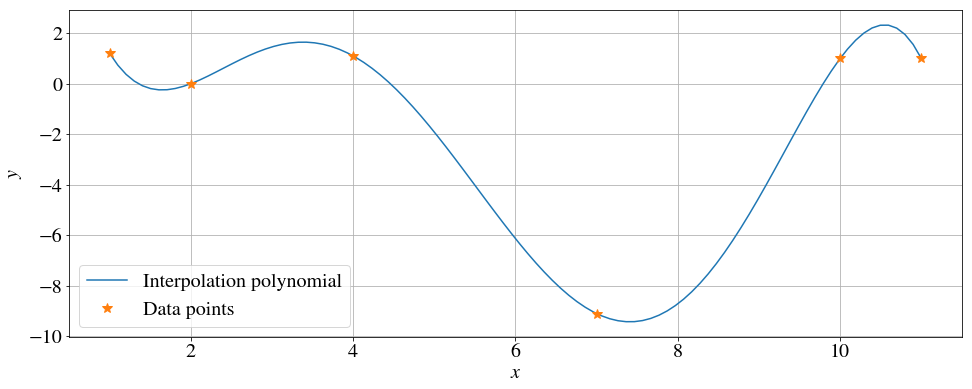

In [3]:
# Define some data points.
x_data = [1.0, 4.0, 7.0, 10.0, 11.0, 2.0]
y_data = [1.2, 1.1,-9.1,  1.0,  1.0, 0.0]

# Define the x-axis.
x = np.linspace(min(x_data), max(x_data),100)

# Perform the Lagrange interpolation.
P = lagrangeInterpolation(x_data, y_data, x)

# Plot the results.
plt.plot(x, P, label='Interpolation polynomial')
plt.plot(x_data, y_data, '*', label='Data points')
plt.legend(), plt.xlabel('$x$'), plt.ylabel('$y$');

If we were to add another point to our data, all the calculations need to be performed again. This is one of the reasons that Lagrange interpolation is often not used in computations, but it is a very intuitive, easy to understand and simple to implement.

## Newton's divided differences.
Denote the unique interpolation polynomial to a set of data points $(x_1,y_1), (x_2,y_2),\cdots, (x_n,y_n)$ as
$$P_{n-1}=f[x_1] + f[x_1\ x_2](x-x_1)+f[x_1\ x_2\ x_3](x-x_1)(x-x_2)+\cdots+f[x_1\ \cdots\ x_n](x-1)\cdots(x-x_{n-1}),$$
where $f[\cdots]$ are the different coefficients of the polynomial. These coefficients are found by [1]
$$f[x_k]=y_k,$$
$$f[x_k \ x_{k+1}]=\frac{f[x_{k+1}]-f[x_k]}{x_{k+1}-x_k},$$
$$f[x_k \ x_{k+1} \ x_{k+2}]=\frac{f[x_{k+1} \ x_{k+2}]-f[x_k \ x_{k+1}]}{x_{k+2}-x_k},$$
$$\vdots$$
This algorithm allows to set it all up in a table that are easy to handle. For three data points this table is

$\qquad\qquad f[x_1]$

$\qquad\qquad\qquad\quad f[x_1 \ x_2]$

$\qquad\qquad f[x_2]\qquad\qquad\quad f[x_1 \ x_2 \ x_3]$

$\qquad\qquad\qquad\quad f[x_2 \ x_3]$

$\qquad\qquad f[x_3]$

We can now read out the coefficient from the first row. When another data point is added, we only need to compute one new "row" of the triangle. We are now going to define some functions that calculates a interpolation polynomial using Newton's divided difference, and then perform the above example once again using this method.

In [4]:
def newtonsDividedDifference(x_data,y_data):
    """Calculates the coeffisients of the interpolatiol polynomial 
    from n data points using Newton's divided difference.
    Parameters:
        x_data: float arr. All the x-values of the data set.
        y_data: float arr. All the y-values of the data set.
                x_data and y_data has to be of the same length.
    Returns:
        c:      float arr. The coeffisients of the interpolation polynomial.
    """
    n = len(x_data) - 1
    c = y_data.copy()
    for i in range(1, n + 1):
        for j in range(n, i - 1 , -1):
            c[j] = (c[j] - c[j - 1])/(x_data[j] - x_data[j - i])
    return c

def polyCoeff(x,x_data,c):
    """Returns a polynomial on the form c_0+c_1*(x-x_1)+c_2*(x-x_1)(x-x_2)...,
    where c_i = c[i] and x_i = x_data[i].
    Parameters:
        x_data: float arr. All the x-values of the data set.
        c:      float arr. Coefficients of the polynomial.
        x:      float arr. x-axis.
    Returns:
        P:      float arr. Polynomial evaluated at x.
    """
    n = len(c) - 1
    P = c[n]
    for i in range( n - 1, -1, -1 ):
        P = P*(x - x_data[i]) + c[i]
    return P

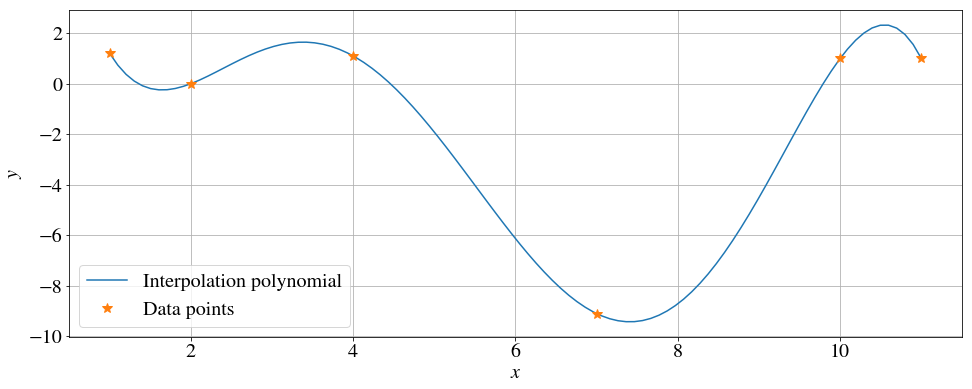

In [5]:
# Perform Newton's divided difference.
c = newtonsDividedDifference(x_data, y_data)
# Write out the interpolating polynomial.
P = polyCoeff(x, x_data, c)

# Plot the results.
plt.figure()
plt.plot(x, P, label='Interpolation polynomial')
plt.plot(x_data, y_data, '*', label='Data points')
plt.legend(), plt.xlabel('$x$'), plt.ylabel('$y$');

## Approximating a complicated function. Error estimate
We can easily apply the previous discussions to approximate a (complicated) function. Since this function is known we can calculate the error.

Let us try to create an approximation to the trigonometric function
$$f(x)=\cos(x),$$
using a set of uniformly distributed function evaluations as the data set.

Maximum absolute error: E = 6.261e-02.


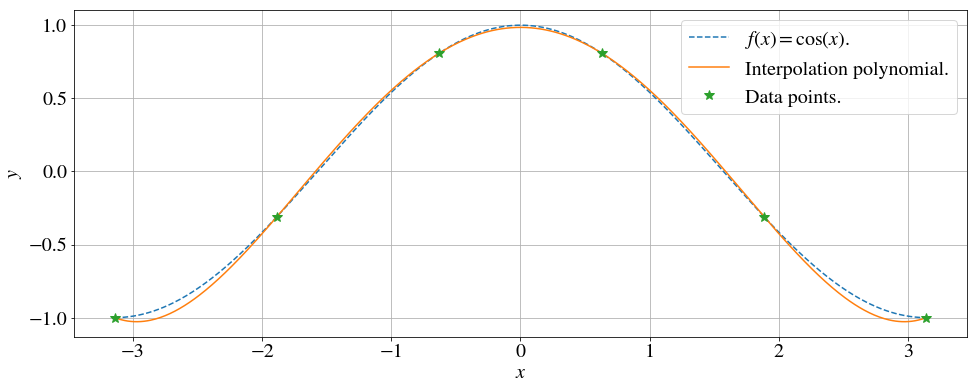

In [6]:
n = 6 # Number of evaluation points.

# Define the function that are being approximated.
def f(x): return np.cos(x)
# Define the values on the x-axis.
x = np.linspace(-np.pi,np.pi,500)
# Plot the function.
plt.plot(x,f(x),'--',label=r'$f(x)=\cos(x)$.')

# Function evaluations.
x_data = np.linspace(-np.pi,np.pi,n)
y_data = f(x_data)

# Performs the interpolation. One can chose any of the preceeding methods.
# --Lagrange interpolation.
#P = lagrangeInterpolation(x_data,y_data,x)
# --Newton's divided difference.
c = newtonsDividedDifference(x_data,y_data)
P = polyCoeff(x,x_data,c)

# Plotting the results and writing out the maximum absolute error.
plt.plot(x,P,label='Interpolation polynomial.')
plt.plot(x_data,y_data,'*',label='Data points.')
plt.legend(), plt.xlabel('$x$'), plt.ylabel('$y$');
E = max(abs(f(x)-P)), 
print("Maximum absolute error: E = %.3e." % (E))

## Runge's phenomenon.
Let us try to approximate the function
$$f(x) = 20\exp\left(-20 x^2\right)$$
in the interval $x\in [-1,1]$ by polynomial interpolation. Let us start by interpolating from a uniformly distributed function evaluations.

Maximum absolute error: E = 3.998e+01.


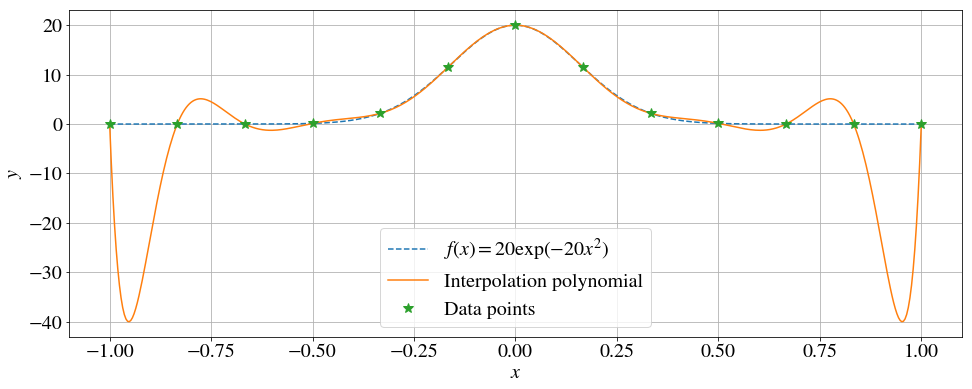

In [7]:
n = 13 # Number of evaluation points.

# Define the function that are being approximated.
def f(x): return 20*np.exp(-20*x**2)

# Define the values on the x-axis.
x = np.linspace(-1,1,500)
# Plot the function.
plt.plot(x, f(x), '--', label=r'$f(x) = 20\exp\left(-20 x^2\right)$')

# Function evaluations.
x_data = np.linspace(-1, 1, n)
y_data = f(x_data)

# Performs the interpolation. One can chose any of the preceeding methods.
# --Lagrange interpolation.
P = lagrangeInterpolation(x_data, y_data, x)
# --Newton's divided difference.
#c = newtonsDividedDifference(x_data,y_data)
#P = polyCoeff(x,x_data,c)

# Plotting the results and writing out the maximum absolute error.
plt.plot(x, P, label='Interpolation polynomial')
plt.plot(x_data, y_data, '*', label='Data points')
plt.legend(), plt.xlabel('$x$'), plt.ylabel('$y$');
E = max(abs(f(x)-P)); print("Maximum absolute error: E = %.3e." % (E))

From the above figure one can see that the interpolation polynomial is a good approximation to the function close to the origin. However, close to the ends of the interpolation interval we observe the so-called Runge's phenomenon. The more function evaluation used, the higher the error becomes. Try for yourself!

Runge's phenomenon can be avoided by choosing the function evaluation more wisely (Chebyshev interpolation), or using so-called spline-interpolation (see our notebook on [Cubic Splines](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/cubic_splines.ipynb)).

## Chebyshev polynomials. Chebyshev interpolation
For a more complete discussions and derivations, we refer you to ref. [1] which was used as main source in this subsection.

The $n$-th Chebyshev polynomial on the interval $x\in [-1,1]$ is defined as
$$T_n(x)=\cos(n \arccos x).$$
Using some trigonometric relations one can show that
$$T_0 = 1$$
$$T_1 = x$$
$$T_2 = 2x^2-1$$
$$T_3 = 4x^3-3x$$
$$\vdots$$
In fact, one can derive the recursive formula
$$T_{n+1}(x)=2xT_n(x)-T_{n-1}(x).$$
Note that the roots of Chebyshev's polynomials are
$$x_k = \cos\frac{\pi \left(2k-1\right)}{2n},\quad k=1,2,...,n.$$
and that the leading coefficient is $2^{n-1}$.
Let us visualize these polynomials.

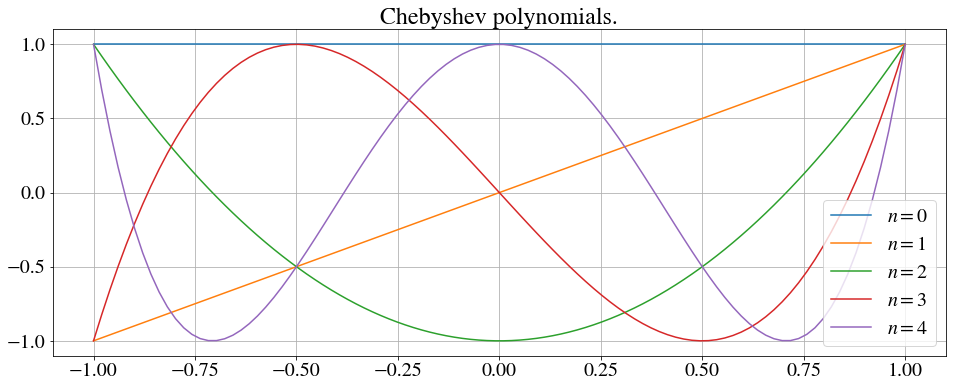

In [8]:
n = 5 # Number of polynomials.
x = np.linspace(-1,1,100) # x-axis.

# Plotting the Chebyshev polynomials.
# --- Using the recursive formula.
T0 = [1]*len(x)
T1 = x
plt.plot(x, T0, label=r'$n = 0$')
plt.plot(x, T1, label=r'$n = 1$')
for i in range(2, n):
    T2 = 2*x*T1 - T0
    plt.plot(x, T2, label=r"$n = %d$"%(i))
    T0 = T1; T1 = T2
# --- Using the definition.
#for i in range(0,n):
#    plt.plot(x,np.cos(i*np.arccos(x)),label = r"$n = %d$" % i)

# Set figure texts.
plt.legend(), plt.title('Chebyshev polynomials.'), plt.ylim([-1.1, 1.1]);

For simplicity, let us assume that we are dealing with an interpolating polynomial on the fixed interval $x\in[-1,1]$ (which is easily generalized). 

It can be shown that if $f(x)$ is $n$ times continuously differentiable, then the interpolation error is given by
$$f(x)-P(x)=\frac{(x-x_1)(x-x_2)\cdots (x-x_n)}{n!}f^{(n)}(c),$$
where $c\in [\min(x,x_1,\cdots,x_n),\max(x,x_1,\cdots,x_n)]$ [1].

The interpolation error is itself a polynomial of degree $n$ with some maximum value on the given interval. Our goal is to minimize this error by choosing the interpolation points is a specific way. Luckily, $\textbf{Chebyshev's theorem}$ yields the answer.

The interpolation points that minimizes $\max_{x\in[-1,1]}|(x-x_1)(x-x_2)\cdots (x-x_n)|$ is 
$$x_i = \cos\frac{(2i-1)\pi}{2n},\quad i = 1,2,\cdots, n,$$
with a minimum value $1/2^{n-1}$. In fact, one can show that minimum value is
$$(x-x_1)(x-x_2)\cdots (x-x_n) = \frac{1}{2^{n-1}}T_n(x).$$

Let us do the outline of a proof. Let $P_n(x)$ be a monic polynomial (the highest degree coefficient is 1). Assume that this polynomial has a smaller absolute maximum than $T_n(x)/2^{n-1}$, which also is a monic polynomial. In other words, $|P_n(x)|<|1/2^{n-1}|$, $x\in[-1,1]$. Since $T_n(x)$ alternates between $-1$ and $1$ $n$ times, $P_n(x)-T_n(x)/2^{n-1}$ has at least $n$ roots, which implies that $P_n(x)-T_n(x)/2^{n-1}$ is of degree at least $n$. This is a contradiction, since $P_n(x)-T_n(x)/2^{n-1}$ must be of degree $n-1$ or smaller, because both $P_n(x)$ and $T_n(x)/2^{n-1}$ are monic of degree $n$.

Using the Chebyshev nodes as bases for the interpolation, the interpolation error will be evenly across the whole interval. The following code will visualize the discussion in this section.

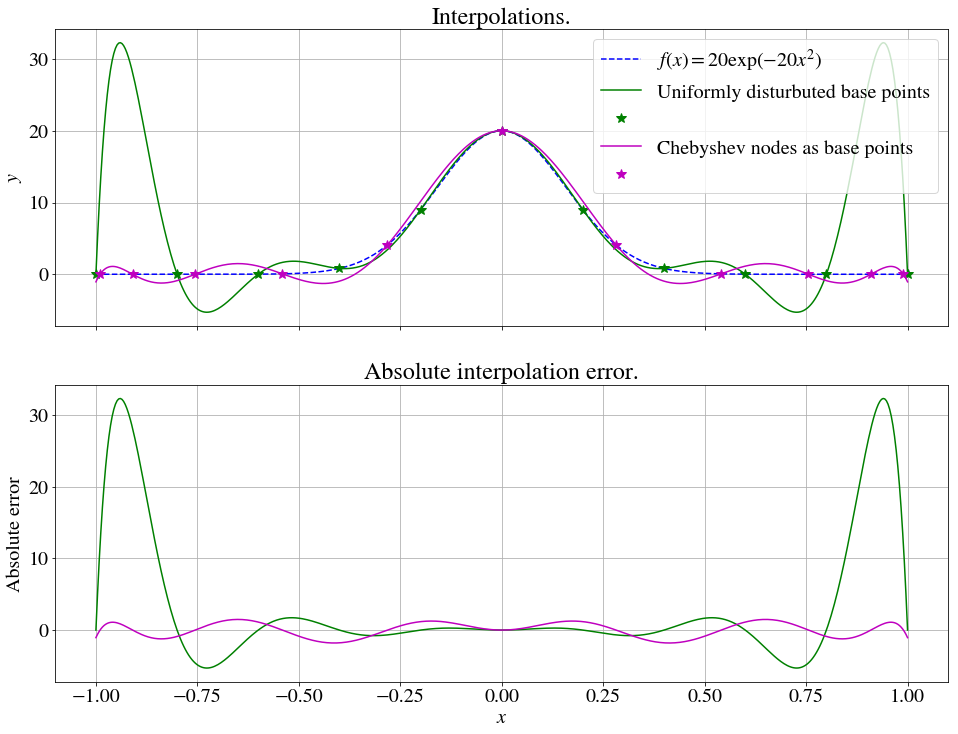

In [9]:
# Define the function that is approximated.
def f(x): return 20*np.exp(-20*x**2)

x = np.linspace(-1, 1, 500) # x-axis.
n = 11 # Number of base points.

# Setting up a subplot with the same x-axis.
# One for the interpolations and one for corresponding errors.
figs = newparams['figure.figsize']
fig,(interpax,errorax) = plt.subplots(2, 1, sharex=True, figsize=(figs[0], figs[1]*2))
interpax.plot(x, f(x), 'b--',label=r'$f(x) = 20\exp\left(-20 x^2\right)$') # Plotting the function.

# Interpolation using uniformly disturbuted base points.
x_data = np.linspace(-1,1,n); y_data = f(x_data)
P = lagrangeInterpolation(x_data,y_data,x)
interpax.plot(x, P, 'g', label='Uniformly disturbuted base points')
interpax.plot(x_data, y_data, 'g*', label=' ')
errorax.plot(x, P - f(x), 'g', label='Uniformly disturbuted base points')

# Interpolation using the Chebyshev nodes as base points.
x_data = np.cos((2*np.linspace(1, n, n) - 1)*np.pi/(2*n))
y_data = f(x_data)
P = lagrangeInterpolation(x_data, y_data,x)
interpax.plot(x, P, 'm', label='Chebyshev nodes as base points')
interpax.plot(x_data, y_data, 'm*', label=' ')
errorax.plot(x, P - f(x), 'm', label='Chebyshev nodes as base points')
interpax.legend()

# Figure texts.
interpax.set_title('Interpolations.'); errorax.set_title('Absolute interpolation error.')
errorax.set_xlabel('$x$'); interpax.set_ylabel('$y$'); errorax.set_ylabel('Absolute error'); 

If we want to use the Chebyshev base points for a general interval $x\in[a,b]$, the interpolation points are 
$$x_i = \frac{b+a}{2}+\frac{b-a}{2}\cos\frac{(2i-1)\pi}{2n},\quad i = 1,2,\cdots, n.$$

## Interpolating parameterized curves.
The previous discussions can easily be more generalized. For example, if we want to interpolate a curve $\vec C(t),\; 0\leq t \leq 1$ to the data set $(x_1,y_1,z_2), (x_2,y_2,z_2),..., (x_n,y_n,z_n)$, one can use
$$\vec P_{n-1}(t) = \sum_{j=1}^n\vec x_jL_j(t),$$
where
$$L_j(t)=\prod_{i = 0, i\neq j}^n\frac{t-t_i}{t_j-t_i}.$$
Even the discussions about Runge's phenomenon and the Chebyshev nodes holds for the parameter value $t$, but we then have to choose $a$ and $b$ as
$$a = \frac{\cos\left(\frac{\pi}{2n}\right)-1}{2\cos\left(\frac{\pi}{2n}\right)},\quad b = \frac{\cos\left(\frac{\pi}{2n}\right)+1}{2\cos\left(\frac{\pi}{2n}\right)},$$
(and not 0 and 1 as one quickly might think).
In the following code, both uniformly distributed parameter nodes and the Chebyshev parameter nodes ($t_i$) are used to interpolate a two given set of (arbitrary) data points.

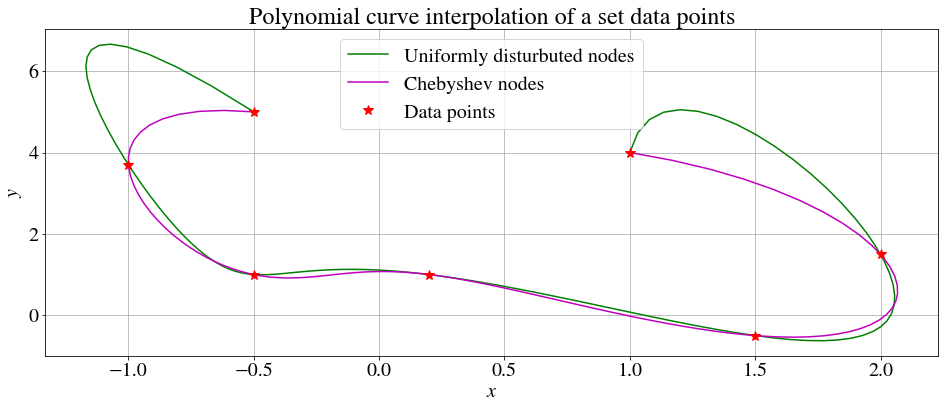

In [10]:
# Define some data points.
x_data = [-0.5,-1.0,-0.5, 0.2, 1.5, 2.0, 1.0]
y_data = [ 5.0, 3.7, 1.0, 1.0,-0.5, 1.5, 4.0]
n = len(x_data) # Number of data points.

# Parameter values.
t = np.linspace(0, 1, 100)

# Curve interpolation using uniformly disturbuted parameter nodes.
t_i = np.linspace(0, 1, n) # Uniformly disturbuted parameter nodes.
Px = lagrangeInterpolation(t_i, x_data, t)
Py = lagrangeInterpolation(t_i, y_data, t)
plt.plot(Px, Py, 'g', label='Uniformly disturbuted nodes') # Plot the result.

# Curve interpolation using Chebyshev nodes as parameter nodes.
a = (np.cos(np.pi/(2*n)) - 1)/(2*np.cos(np.pi/(2*n)))
b = (np.cos(np.pi/(2*n)) + 1)/(2*np.cos(np.pi/(2*n)))
t_i = (b + a)/2 + (b - a)/2*np.cos((2*n - 2*np.linspace(1, n, n) + 1)*np.pi/(2*n)) # Chebyshev nodes.
Px = lagrangeInterpolation(t_i, x_data, t)
Py = lagrangeInterpolation(t_i, y_data, t)
plt.plot(Px, Py, 'm', label='Chebyshev nodes') # Plot the result.

# Plot the data points and set figure texts.
plt.plot(x_data, y_data, 'r*', label='Data points')
plt.title('Polynomial curve interpolation of a set data points')
plt.legend(), plt.xlabel('$x$'), plt.ylabel('$y$');

As earlier, we can also approximate a (complicated) curve. Let us try to approximate the curve
$$\vec C(t)=\left(\frac{r^2-3}{r^2+1},\frac{r^3-3r}{r^2+1}\right), \quad r\in[-5/2,5/2],$$
using both uniformly distributed base nodes and Chebyshev base nodes.

Uniformly disturbuted nodes: E = 1.460e+00.
Chebyshev nodes: E = 2.298e-02.


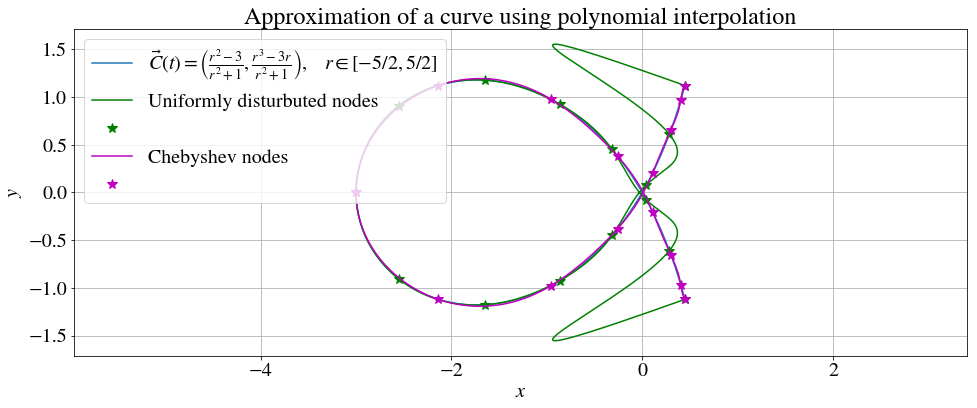

In [11]:
# Define the curve that is approximated.
# As a small trick, we will calculate with 0<t<1 and in the function definition transform into r.
def C(t):
    r = 5*(t - 0.5)
    return (r**2 - 3)/(r**2 + 1), (r**3 - 3*r)/(r**2 + 1)

n = 15 # Number of data points.
t = np.linspace(0, 1, 1000) # Parameter value.

# Plot f(x).
x,y = C(t)
plt.plot(x, y,
 label=r'$\vec C(t)=\left(\frac{r^2-3}{r^2+1},\frac{r^3-3r}{r^2+1}\right), \quad r\in[-5/2,5/2]$')

# Curve interpolation using uniformly disturbuted parameter nodes.
t_i = np.linspace(0, 1, n) # Uniformly disturbuted parameter nodes.
x_data,y_data = C(t_i)
Px = lagrangeInterpolation(t_i, x_data, t)
Py = lagrangeInterpolation(t_i, y_data, t)
plt.plot(Px, Py, 'g', label='Uniformly disturbuted nodes')
plt.plot(x_data, y_data, 'g*', label=' ')
# Calculating the maximum absolute error.
E = max(abs(((Px - x)**2 + (Py - y)**2)**0.5))
print("Uniformly disturbuted nodes: E = %.3e." % (E))

# Curve interpolation using Chebyshev nodes as parameter nodes.
a = (np.cos(np.pi/(2*n))-1)/(2*np.cos(np.pi/(2*n)))
b = (np.cos(np.pi/(2*n))+1)/(2*np.cos(np.pi/(2*n)))
t_i = (b + a)/2 + (b - a)/2*np.cos((2*n-2*np.linspace(1, n, n) + 1)*np.pi/(2*n))
x_data,y_data = C(t_i)
Px = lagrangeInterpolation(t_i, x_data, t)
Py = lagrangeInterpolation(t_i, y_data, t)
plt.plot(Px, Py, 'm', label='Chebyshev nodes')
plt.plot(x_data, y_data, 'm*', label=' ')
# Calculating the maximum absolute error.
E = max(abs(((Px-x)**2+(Py-y)**2)**0.5))
print("Chebyshev nodes: E = %.3e."%(E))

# Set figure texts.
plt.title('Approximation of a curve using polynomial interpolation')
plt.legend(), plt.xlabel('$x$'), plt.ylabel('$y$'), plt.axis('equal');

### Sources an further reading
[1] Sauer, T.: Numerical Analysis international edition, second edition, Pearson 2014

[2] Weisstein, Eric W. "Newton's Divided Difference Interpolation Formula." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/NewtonsDividedDifferenceInterpolationFormula.html (acquired March 28. 2016)

[3] Archer, Branden and Weisstein, Eric W. "Lagrange Interpolating Polynomial." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/LagrangeInterpolatingPolynomial.html (acquired March 28. 2016)

Scipy has a number of different interpolation functions. Check it out:
http://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html (acquired March 18. 2016)